In [22]:
# Experiment XGBoost
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

### Baseline XGboost without tuning

In [31]:
# Load the dataset
data = pd.read_csv('./cleaned_numeric_data.csv')

# Define features and target
X = data.drop(columns=['Overall'])
y = data['Overall']

# Identify categorical and continuous features
categorical_features = ['Apperance', 'Palate']
continuous_features = ['Aroma', 'Taste']

# Define the column transformer with appropriate transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('num', StandardScaler(), continuous_features)
    ]
)

# Define the model pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', xgb.XGBRegressor(objective='reg:squarederror',
                                   colsample_bytree=1.0,
                                   learning_rate=0.1,
                                   max_depth=7,
                                   n_estimators=100,
                                   subsample=1.0))
])

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model with the best parameters
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.4f}')
print(f'Root Mean Squared Error: {rmse:.4f}')
print(f'R-squared: {r2:.4f}')

Mean Squared Error: 2.0958
Root Mean Squared Error: 1.4477
R-squared: 0.8136


In [10]:
# Define the model
xg_reg = XGBRegressor(objective='reg:squarederror')

# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'colsample_bytree': [0.3, 0.7, 1.0],
    'subsample': [0.5, 0.7, 1.0]
}

# Define the grid search
grid_search = GridSearchCV(estimator=xg_reg, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)

# Perform the grid search
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print(f'Best parameters: {grid_search.best_params_}')
print(f'Best score: {grid_search.best_score_}')

Fitting 3 folds for each of 324 candidates, totalling 972 fits
[CV] END colsample_bytree=0.3, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=1.0; total time=   3.3s
[CV] END colsample_bytree=0.3, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=1.0; total time=   3.2s
[CV] END colsample_bytree=0.3, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.7; total time=   3.6s
[CV] END colsample_bytree=0.3, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.7; total time=   3.6s
[CV] END colsample_bytree=0.3, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.7; total time=   3.7s
[CV] END colsample_bytree=0.3, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.5; total time=   3.7s
[CV] END colsample_bytree=0.3, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.5; total time=   3.8s
[CV] END colsample_bytree=0.3, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.5; total time=   3.9s
[CV] END colsampl

/Users/lijianpeng/anaconda3/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END colsample_bytree=0.3, learning_rate=0.01, max_depth=10, n_estimators=200, subsample=0.7; total time=  15.9s
[CV] END colsample_bytree=0.3, learning_rate=0.01, max_depth=10, n_estimators=200, subsample=0.5; total time=  17.0s
[CV] END colsample_bytree=0.3, learning_rate=0.01, max_depth=10, n_estimators=200, subsample=0.5; total time=  16.9s
[CV] END colsample_bytree=0.3, learning_rate=0.01, max_depth=10, n_estimators=200, subsample=1.0; total time=  13.1s
[CV] END colsample_bytree=0.3, learning_rate=0.01, max_depth=10, n_estimators=200, subsample=0.5; total time=  16.7s
[CV] END colsample_bytree=0.3, learning_rate=0.01, max_depth=10, n_estimators=200, subsample=0.7; total time=  15.8s
[CV] END colsample_bytree=0.3, learning_rate=0.01, max_depth=10, n_estimators=200, subsample=0.7; total time=  15.4s
[CV] END colsample_bytree=0.3, learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.5; total time=   3.3s
[CV] END colsample_bytree=0.3, learning_rate=0.1, max_depth=3, n_es

### XGboost with best params

In [11]:
# Train the model with the best parameters
best_xg_reg = grid_search.best_estimator_
best_xg_reg.fit(X_train, y_train)

# Make predictions
y_pred = best_xg_reg.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.4f}')
print(f'Root Mean Squared Error: {rmse:.4f}')
print(f'R-squared: {r2:.4f}')

Mean Squared Error: 2.0632
Root Mean Squared Error: 1.4364
R-squared: 0.8165


Best parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100, 'subsample': 1.0}
Best score: -2.0566671249301303
[0]	validation_0-rmse:3.08416	validation_1-rmse:3.08376
[1]	validation_0-rmse:2.84720	validation_1-rmse:2.84727
[2]	validation_0-rmse:2.63965	validation_1-rmse:2.64012
[3]	validation_0-rmse:2.45859	validation_1-rmse:2.45945
[4]	validation_0-rmse:2.30138	validation_1-rmse:2.30257
[5]	validation_0-rmse:2.16545	validation_1-rmse:2.16700
[6]	validation_0-rmse:2.04861	validation_1-rmse:2.05044
[7]	validation_0-rmse:1.94863	validation_1-rmse:1.95069
[8]	validation_0-rmse:1.86354	validation_1-rmse:1.86587
[9]	validation_0-rmse:1.79159	validation_1-rmse:1.79413
[10]	validation_0-rmse:1.73079	validation_1-rmse:1.73348
[11]	validation_0-rmse:1.67980	validation_1-rmse:1.68265
[12]	validation_0-rmse:1.63716	validation_1-rmse:1.64015
[13]	validation_0-rmse:1.60167	validation_1-rmse:1.60478
[14]	validation_0-rmse:1.57216	validation_1-rmse:1.57536
[15

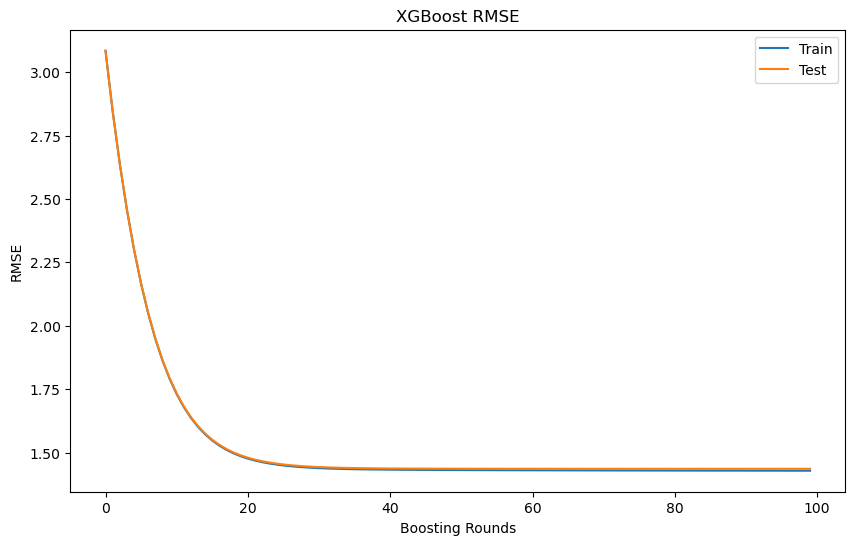

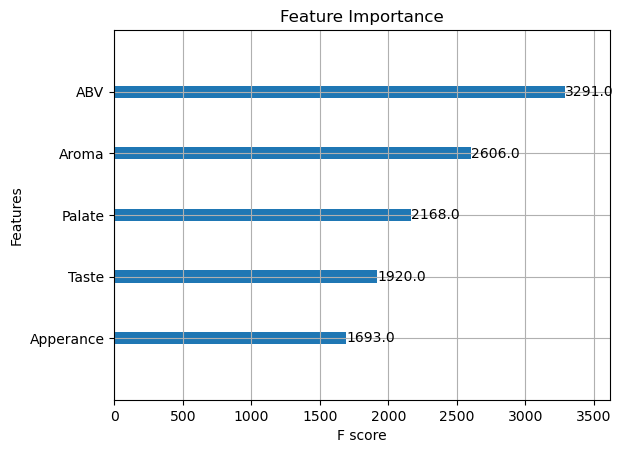

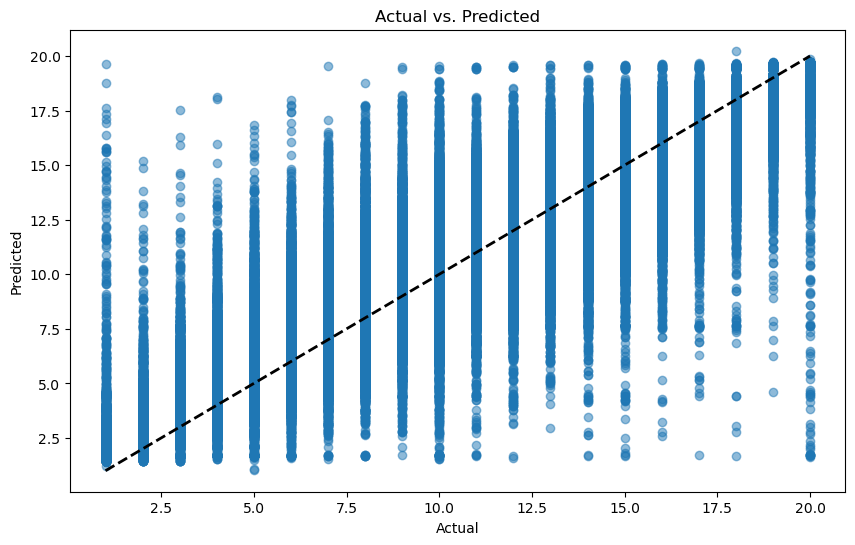

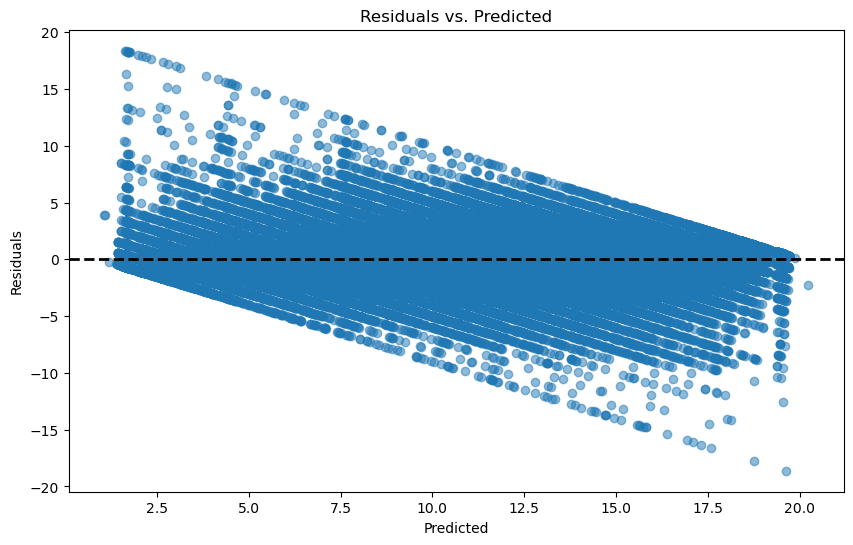

In [26]:
# Print the best parameters and the best score
print(f'Best parameters: {grid_search.best_params_}')
print(f'Best score: {grid_search.best_score_}')

# Train the model with the best parameters
best_xg_reg = grid_search.best_estimator_
best_xg_reg.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], verbose=True)

# Make predictions
y_pred = best_xg_reg.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.4f}')
print(f'Root Mean Squared Error: {rmse:.4f}')
print(f'R-squared: {r2:.4f}')

# Plotting training and validation loss
evals_result = best_xg_reg.evals_result()
epochs = len(evals_result['validation_0']['rmse'])
x_axis = range(0, epochs)

plt.figure(figsize=(10, 6))
plt.plot(x_axis, evals_result['validation_0']['rmse'], label='Train')
plt.plot(x_axis, evals_result['validation_1']['rmse'], label='Test')
plt.xlabel('Boosting Rounds')
plt.ylabel('RMSE')
plt.title('XGBoost RMSE')
plt.legend()
plt.show()

# Feature importance plot
xgb.plot_importance(best_xg_reg, importance_type='weight')
plt.title('Feature Importance')
plt.show()

# Actual vs. Predicted values plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.show()

# Residual plot
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='k', linestyle='--', lw=2)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted')
plt.show()